In [6]:
%gui qt
from mayavi import mlab
import numpy as np
mlab.test_plot3d()
import mayavi.mlab

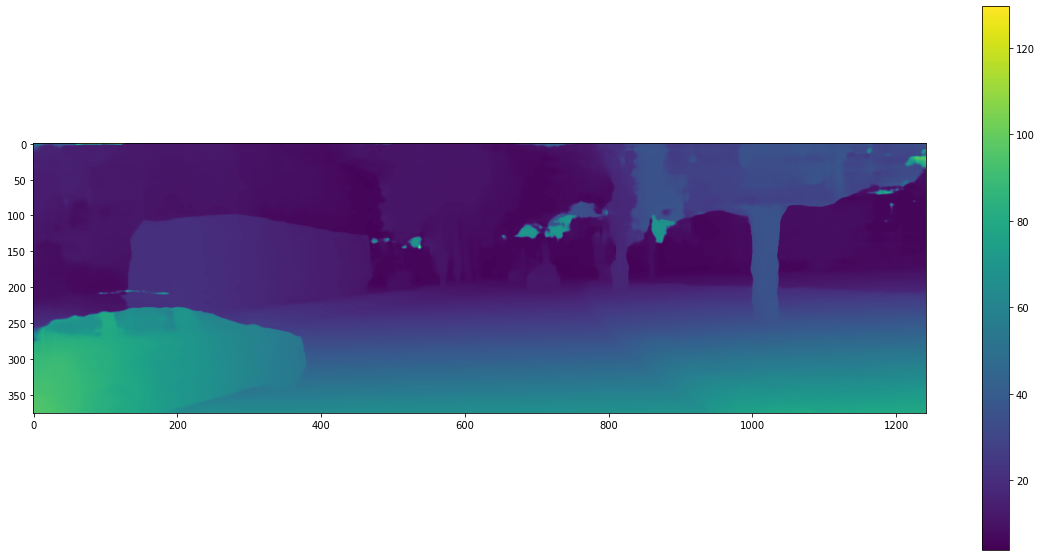

In [3]:
#Show disp
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
import imageio
disp = imageio.imread('../result/psmnet_disp_all/000016.png')/256
#disp = imageio.imread('./KITTI/object/training/disparity/000003.png')/256
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()
disp_original = disp

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


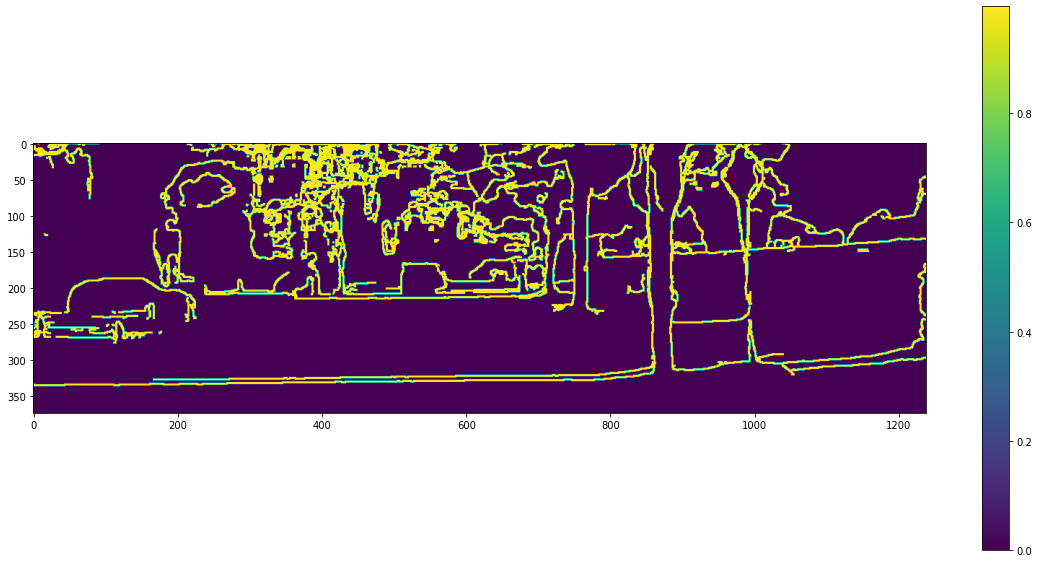

In [101]:
#Show disp
from matplotlib import pyplot as plt

plt.figure(figsize = (20,10))
import imageio
disp = imageio.imread('./filtered_disp/000016.png')/256
disp = imageio.imread('./filter_edges/000006.png')/256

#disp = disp - disp_original
#disp = imageio.imread('./KITTI/object/training/disparity/000003.png')/256
print(disp)
plt.imshow(disp, cmap="viridis")
plt.colorbar()
plt.show()



In [111]:
#Script for comparing pseudo lidar and True value.
index = "000006.bin"
pointcloud = np.fromfile(str("../filters/pl/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("../result/psmnet_pl_all/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud1 = np.fromfile(str("../result/psmnet_sedge_pl/"+index), dtype=np.float32, count=-1).reshape([-1,4])
#pointcloud = np.fromfile(str("../result/psmnet_obj_noedge_pl/"+index), dtype=np.float32, count=-1).reshape([-1,4])
pointcloud1 = np.fromfile(str("../KITTI/object/training/velodyne/"+index), dtype=np.float32, count=-1).reshape([-1,4])
x = pointcloud[:, 0]  # x position of point
y = pointcloud[:, 1]  # y position of point
z = pointcloud[:, 2]  # z position of point
r = pointcloud[:, 3]  # reflectance value of point
d = np.sqrt(x ** 2 + y ** 2)  # Map Distance from sensor

x1 = pointcloud1[:, 0]  # x position of point
y1 = pointcloud1[:, 1]  # y position of point
z1 = pointcloud1[:, 2]  # z position of point
r1 = pointcloud1[:, 3]  # reflectance value of point
d1 = np.sqrt(x1 ** 2 + y1 ** 2)  # Map Distance from sensor
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(640, 500))
mayavi.mlab.points3d(x, y, z,
                     d,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(1, 0, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

mayavi.mlab.points3d(x1, y1, z1,
                     d1,          # Values used for Color
                     mode="point",
                     #colormap='spectral', # 'bone', 'copper', 'gnuplot'
                     color=(0, 1, 0),   # Used a fixed (r,g,b) instead
                     figure=fig,
                     )

x=np.linspace(5,5,50)
y=np.linspace(0,0,50)
z=np.linspace(0,5,50)
x1=np.linspace(5,5,50)
y1=np.linspace(0,0,50)
z1=np.linspace(0,5,50)
mayavi.mlab.plot3d(x,y,z)
mayavi.mlab.plot3d(x1,y1,z1)